## Final Project Submission

Please fill out:
* Student name: Matthew Lipman
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Amber Yandow
* Blog post URL:

In [1]:
# importing the packages we will be using for this project
import pandas as pd
# setting pandas display to avoid scientific notation in my dataframes
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from bs4 import BeautifulSoup
import json
import requests

import folium

import haversine as hs 

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import scipy.stats as stats

import pylab

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('./data/all_features_ppsqft_quant.csv', index_col=0)
df.price.describe()

count     17495.00
mean     493768.83
std      263979.70
min       78000.00
25%      310000.00
50%      435000.00
75%      607500.00
max     3300000.00
Name: price, dtype: float64

In [3]:
mode = int(df.price.mode())

In [4]:
mode

350000

### Visualizing Untransformed Target Variable

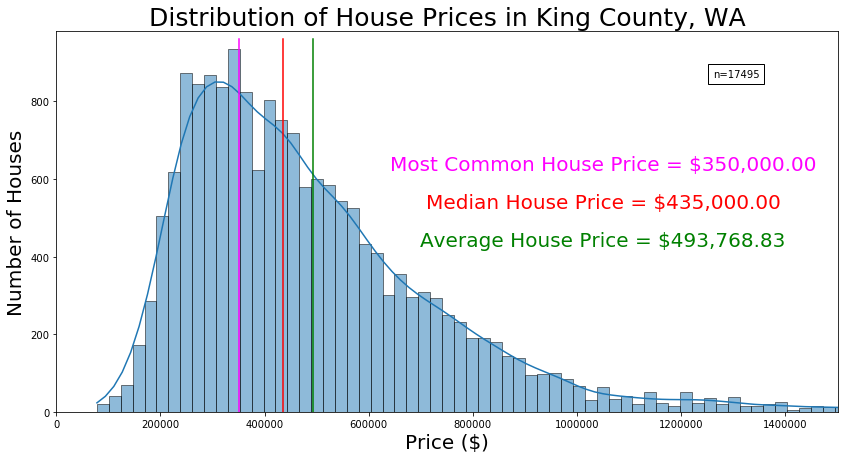

In [5]:
plt.figure(figsize=(14,7))
ax = sns.histplot(df['price'], kde=True)
ax.set_xlim(left=0, right=1500000)
ax.set_title('Distribution of House Prices in King County, WA', fontsize=25)
ax.set_xlabel('Price ($)', fontsize=20)
ax.set_ylabel('Number of Houses', fontsize=20)
ax.axvline(df['price'].mean(), color='green', ymax=0.98)
ax.axvline(df['price'].median(), color='red', ymax=0.98)
ax.axvline(mode, color='magenta', ymax=0.98)
ax.text(0.70, 0.55, "Median House Price = $435,000.00",
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='red',
        transform=ax.transAxes)
ax.text(0.70, 0.45, "Average House Price = $493,768.83",
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='green',
        transform=ax.transAxes)
ax.text(0.70, 0.65, "Most Common House Price = $350,000.00",
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='magenta',
        transform=ax.transAxes)
ax.text(.9, .9, 'n=17495', color='black',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,
        bbox=dict(facecolor='none', edgecolor='black', pad=5.0));

## Final Model Analysis

### Step 1) Quantile-transformed 'sqft_living'

In [6]:
features = ['quant_sqft_living']
target = ['quant_price']
X = df[features]
y = df[target]

# running an iteration of the model using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

model_v1 = LinearRegression().fit(X_train, y_train)
model_v1_preds = model_v1.predict(X_test)

print('R^2: ', r2_score(y_test, model_v1_preds))

R^2:  0.5234301710772002


In [7]:
formula = "quant_price ~ quant_sqft_living"
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            quant_price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                 2.005e+04
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        02:29:23   Log-Likelihood:                -18156.
No. Observations:               17495   AIC:                         3.632e+04
Df Residuals:                   17493   BIC:                         3.633e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0003      0.005      0.059      0.953      -0.010       0.010
quant_sqft_living     0.7313      0.005    141.583      0.000       0.721       0.741
==============================================================================
Omnibus:                      878.935   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              530.561
Skew:                          -0.290   Prob(JB):                    6.17e-116
Kurtosis:                       2.374   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **Comment:** Square Footage of one's home is able to explain the price of one's home 53.4% of the time.

### Step 2) Quantile-transformed square foot living and nearest distance to one of King County's top coffee shops

In [8]:
features = ['quant_sqft_living','quant_coffee']
target = ['quant_price']
X = df[features]
y = df[target]

# running an iteration of the model using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

model_v2 = LinearRegression().fit(X_train, y_train)
model_v2_preds = model_v2.predict(X_test)

print('R^2: ', r2_score(y_test, model_v2_preds))

R^2:  0.5303765439983774


In [9]:
formula = "quant_price ~ quant_sqft_living+quant_coffee"
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            quant_price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                 1.032e+04
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        02:29:23   Log-Likelihood:                -18021.
No. Observations:               17495   AIC:                         3.605e+04
Df Residuals:                   17492   BIC:                         3.607e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0003      0.005      0.058      0.953      -0.010       0.010
quant_sqft_living     0.7200      0.005    139.258      0.000       0.710       0.730
quant_coffee         -0.0855      0.005    -16.532      0.000      -0.096      -0.075
==============================================================================
Omnibus:                      706.243   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              443.653
Skew:                          -0.260   Prob(JB):                     4.59e-97
Kurtosis:                       2.418   Cond. No.                         1.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **Comment:** Square Footage of one's home and proximity to a top coffee shop is able to explain the price of one's home 54.1% of the time. (+0.7%)

### Step 3) Quantile-transformed square foot living, nearest distance to one of King County's top coffee shops, and nearest distance to public parks

In [10]:
features = ['quant_sqft_living','quant_coffee', 'quant_parks']
target = ['quant_price']
X = df[features]
y = df[target]

# running an iteration of the model using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

model_v3 = LinearRegression().fit(X_train, y_train)
model_v3_preds = model_v3.predict(X_test)

print('R^2: ', r2_score(y_test, model_v3_preds))

R^2:  0.5304316695892201


In [11]:
formula = "quant_price ~ quant_sqft_living+quant_coffee+quant_parks"
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            quant_price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     6878.
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        02:29:23   Log-Likelihood:                -18020.
No. Observations:               17495   AIC:                         3.605e+04
Df Residuals:                   17491   BIC:                         3.608e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0003      0.005      0.059      0.953      -0.010       0.010
quant_sqft_living     0.7200      0.005    139.262      0.000       0.710       0.730
quant_coffee         -0.0855      0.005    -16.542      0.000      -0.096      -0.075
quant_parks          -0.0077      0.005     -1.503      0.133      -0.018       0.002
==============================================================================
Omnibus:                      705.484   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.702
Skew:                          -0.259   Prob(JB):                     7.39e-97
Kurtosis:                       2.418   Cond. No.                         1.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **Comment:** Square Footage of one's home, proximity to a top coffee shop, and distance to the nearest public park is able to explain the price of one's home 54.1% of the time. This has no increase to the model's predictability.

### Step 4) Quantile-transformed square foot living, nearest distance to one of King County's top coffee shops, nearest distance to public parks, and distance to a top public school

In [12]:
features = ['quant_sqft_living','quant_coffee', 'quant_parks', 'quant_schools']
target = ['quant_price']
X = df[features]
y = df[target]

# running an iteration of the model using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

model_v4 = LinearRegression().fit(X_train, y_train)
model_v4_preds = model_v4.predict(X_test)

print('R^2: ', r2_score(y_test, model_v4_preds))

R^2:  0.6697767519942743


In [13]:
formula = "quant_price ~ quant_sqft_living+quant_coffee+quant_parks+quant_schools"
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            quant_price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     9233.
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        02:29:23   Log-Likelihood:                -14906.
No. Observations:               17495   AIC:                         2.982e+04
Df Residuals:                   17490   BIC:                         2.986e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0004      0.004      0.100      0.920      -0.008       0.009
quant_sqft_living     0.7259      0.004    167.731      0.000       0.717       0.734
quant_coffee         -0.0176      0.004     -4.004      0.000      -0.026      -0.009
quant_parks          -0.0062      0.004     -1.443      0.149      -0.015       0.002
quant_schools        -0.3762      0.004    -86.476      0.000      -0.385      -0.368
==============================================================================
Omnibus:                      262.142   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.063
Skew:                          -0.300   Prob(JB):                     3.08e-60
Kurtosis:                       3.125   Cond. No.                         1.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **Comment:** Square Footage of one's home, proximity to a top coffee shop, distance to the nearest public park, and distance to nearest top public school are able to explain the price of one's home 67.9% of the time. This has no increase to the model's predictability. (+13.8%)

### Step 5) Quantile-transformed square foot living, nearest distance to one of King County's top coffee shops, nearest distance to public parks, distance to a top public school, and distance to the nearest Church of Scientology

In [14]:
features = ['quant_sqft_living','quant_coffee', 'quant_parks', 'quant_schools', 'quant_scientology']
target = ['quant_price']
X = df[features]
y = df[target]

# running an iteration of the model using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

model_v5 = LinearRegression().fit(X_train, y_train)
model_v5_preds = model_v5.predict(X_test)

print('R^2: ', r2_score(y_test, model_v5_preds))

R^2:  0.703013634853811


In [15]:
formula = "quant_price ~ quant_sqft_living+quant_coffee+quant_parks+quant_schools+quant_scientology"
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            quant_price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     8720.
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        02:29:23   Log-Likelihood:                -13894.
No. Observations:               17495   AIC:                         2.780e+04
Df Residuals:                   17489   BIC:                         2.785e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0005      0.004      0.120      0.904      -0.007       0.008
quant_sqft_living     0.7363      0.004    179.974      0.000       0.728       0.744
quant_coffee         -0.0341      0.004     -8.196      0.000      -0.042      -0.026
quant_parks          -0.0078      0.004     -1.917      0.055      -0.016       0.000
quant_schools        -0.2242      0.005    -42.659      0.000      -0.235      -0.214
quant_scientology    -0.2401      0.005    -46.297      0.000      -0.250      -0.230
==============================================================================
Omnibus:                      516.907   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              588.508
Skew:                          -0.396   Prob(JB):                    1.61e-128
Kurtosis:                       3.423   Cond. No.                         2.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **Comment:** Square Footage of one's home, proximity to a top coffee shop, distance to the nearest public park, distance to nearest top public school, and distance to nearest Church of Scientology are able to explain the price of one's home 71.4% of the time. (+3.5%)

### Step 6) Quantile-transformed square foot living, nearest distance to one of King County's top coffee shops, nearest distance to public parks, distance to a top public school, distance to the nearest Church of Scientology, and grade

In [16]:
features = ['quant_sqft_living','quant_coffee', 'quant_parks', 'quant_schools', 'quant_scientology', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13']
target = ['quant_price']
X = df[features]
y = df[target]

# running an iteration of the model using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

model_v6 = LinearRegression().fit(X_train, y_train)
model_v6_preds = model_v6.predict(X_test)

print('R^2: ', r2_score(y_test, model_v6_preds))

R^2:  0.7552373861151396


In [17]:
formula = "quant_price ~ quant_sqft_living+quant_coffee+quant_parks+quant_schools+quant_scientology+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+grade_13"
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            quant_price   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     3962.
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        02:29:23   Log-Likelihood:                -12338.
No. Observations:               17495   AIC:                         2.471e+04
Df Residuals:                   17480   BIC:                         2.482e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.7663      0.123     -6.209      0.000      -1.008      -0.524
quant_sqft_living     0.4992      0.006     89.539      0.000       0.488       0.510
quant_coffee         -0.0199      0.004     -5.195      0.000      -0.027      -0.012
quant_parks          -0.0060      0.004     -1.609      0.108      -0.013       0.001
quant_schools        -0.2122      0.005    -44.011      0.000      -0.222      -0.203
quant_scientology    -0.2482      0.005    -52.195      0.000      -0.258      -0.239
grade_5               0.1732      0.128      1.356      0.175      -0.077       0.424
grade_6               0.3096      0.123      2.510      0.012       0.068       0.551
grade_7               0.5891      0.123      4.776      0.000       0.347       0.831
grade_8               0.8889      0.124      7.178      0.000       0.646       1.132
grade_9               1.2037      0.125      9.653      0.000       0.959       1.448
grade_10              1.4382      0.126     11.425      0.000       1.191       1.685
grade_11              1.7255      0.129     13.408      0.000       1.473       1.978
grade_12              2.0955      0.144     14.519      0.000       1.813       2.378
grade_13              2.3441      0.237      9.901      0.000       1.880       2.808
==============================================================================
Omnibus:                      391.709   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              515.011
Skew:                          -0.281   Prob(JB):                    1.47e-112
Kurtosis:                       3.625   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **Comment:** Square Footage of one's home, proximity to a top coffee shop, distance to the nearest public park, distance to nearest top public school, and grade are able to explain the price of one's home 76.0% of the time. (+4.6%)

### Step 7) Include feature "quantile interaction" to account for heteroskedasticity

In [18]:
features = ['quant_sqft_living','quant_coffee', 'quant_parks', 'quant_schools', 'quant_scientology', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'quant_interaction']
target = ['quant_price']
X = df[features]
y = df[target]

# running an iteration of the model using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

model_v7 = LinearRegression().fit(X_train, y_train)
model_v7_preds = model_v7.predict(X_test)

print('R^2: ', r2_score(y_test, model_v7_preds))

R^2:  0.7559870492262424


In [19]:
formula = "quant_price ~ quant_sqft_living+quant_coffee+quant_parks+quant_schools+quant_scientology+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+grade_13+quant_interaction"
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            quant_price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     3711.
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        02:29:23   Log-Likelihood:                -12314.
No. Observations:               17495   AIC:                         2.466e+04
Df Residuals:                   17479   BIC:                         2.479e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.7602      0.123     -6.167      0.000      -1.002      -0.519
quant_sqft_living     0.4987      0.006     89.561      0.000       0.488       0.510
quant_coffee         -0.0269      0.004     -6.792      0.000      -0.035      -0.019
quant_parks          -0.0059      0.004     -1.595      0.111      -0.013       0.001
quant_schools        -0.0690      0.021     -3.229      0.001      -0.111      -0.027
quant_scientology    -0.1565      0.014    -11.053      0.000      -0.184      -0.129
grade_5               0.1626      0.128      1.274      0.203      -0.088       0.413
grade_6               0.3070      0.123      2.492      0.013       0.066       0.549
grade_7               0.5833      0.123      4.736      0.000       0.342       0.825
grade_8               0.8820      0.124      7.131      0.000       0.640       1.124
grade_9               1.1951      0.125      9.596      0.000       0.951       1.439
grade_10              1.4316      0.126     11.387      0.000       1.185       1.678
grade_11              1.7193      0.129     13.377      0.000       1.467       1.971
grade_12              2.0848      0.144     14.463      0.000       1.802       2.367
grade_13              2.3285      0.236      9.847      0.000       1.865       2.792
quant_interaction    -0.2132      0.031     -6.879      0.000      -0.274      -0.152
==============================================================================
Omnibus:                      391.796   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              511.788
Skew:                          -0.283   Prob(JB):                    7.35e-112
Kurtosis:                       3.617   Cond. No.                         175.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **Comment:** Square Footage of one's home, proximity to a top coffee shop, distance to the nearest public park, distance to nearest top public school, distance to the nearest Church of Scientology, grade, and the quantile interaction are able to explain the price of one's home 76.1% of the time. (+0.1%)

### Step 8) Picking the top 4 to view R-squared value

In [20]:
features = ['quant_sqft_living', 'quant_schools', 'quant_scientology', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13']
target = ['quant_price']
X = df[features]
y = df[target]

# running an iteration of the model using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

model_v8 = LinearRegression().fit(X_train, y_train)
model_v8_preds = model_v8.predict(X_test)

print('R^2: ', r2_score(y_test, model_v8_preds))

R^2:  0.7548633078458108


In [21]:
formula = "quant_price ~ quant_sqft_living+quant_schools+quant_scientology+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+grade_13"
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            quant_price   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     4613.
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        02:29:23   Log-Likelihood:                -12353.
No. Observations:               17495   AIC:                         2.473e+04
Df Residuals:                   17482   BIC:                         2.483e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.7594      0.124     -6.149      0.000      -1.002      -0.517
quant_sqft_living     0.5005      0.006     89.802      0.000       0.490       0.511
quant_schools        -0.2169      0.005    -45.801      0.000      -0.226      -0.208
quant_scientology    -0.2462      0.005    -51.896      0.000      -0.255      -0.237
grade_5               0.1757      0.128      1.374      0.169      -0.075       0.426
grade_6               0.3015      0.123      2.443      0.015       0.060       0.544
grade_7               0.5806      0.123      4.704      0.000       0.339       0.822
grade_8               0.8823      0.124      7.119      0.000       0.639       1.125
grade_9               1.1998      0.125      9.615      0.000       0.955       1.444
grade_10              1.4363      0.126     11.402      0.000       1.189       1.683
grade_11              1.7260      0.129     13.401      0.000       1.474       1.978
grade_12              2.0974      0.144     14.521      0.000       1.814       2.381
grade_13              2.3335      0.237      9.848      0.000       1.869       2.798
==============================================================================
Omnibus:                      377.426   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              486.296
Skew:                          -0.280   Prob(JB):                    2.52e-106
Kurtosis:                       3.594   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **Comment:** Square Footage of one's home, distance to nearest top public school, grade, and the distance to the nearest church of scientology are able to explain the price of one's home 76.0% of the time.